# Important points/steps:
- Understand the problem statement.
- Recognise the task.(Regression task/Classification task/Clustering task)
- Perform Cleaning, Preprocessing, Feature engineering and EDA.
-  Train suitable machine learning model.
- Tune and evaluate the performance.
- Choose the best model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drugs=pd.read_csv('/content/drug200.csv')
drugs.head(7)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY


# Preprocessing steps:

In [3]:
# info()
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#### Checking for duplicate rows

In [4]:
drugs.duplicated().sum()

0

#### drop duplicates if any are present

In [5]:
drugs.drop_duplicates(inplace =True)

#### Checking for null values

In [6]:
drugs.isna().sum() # isna() or isnull()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### Checking for number of unique items in each column

In [7]:
drugs.nunique() # no of unique items in each column.

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

#### Checking for unique characters in object column


In [8]:
print("Gender             :",drugs['Sex'].unique())
print("BP levels          :",drugs['BP'].unique())
print("Cholesterol levels :",drugs['Cholesterol'].unique())
print("Types of drugs     :",drugs['Drug'].unique())

Gender             : ['F' 'M']
BP levels          : ['HIGH' 'LOW' 'NORMAL']
Cholesterol levels : ['HIGH' 'NORMAL']
Types of drugs     : ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


#### Above after checking all the object columns, we came to know that no "weird characters" are present.

# Exploratory data analysis:

# Q. Which drug is more popular?

<Axes: xlabel='Drug', ylabel='count'>

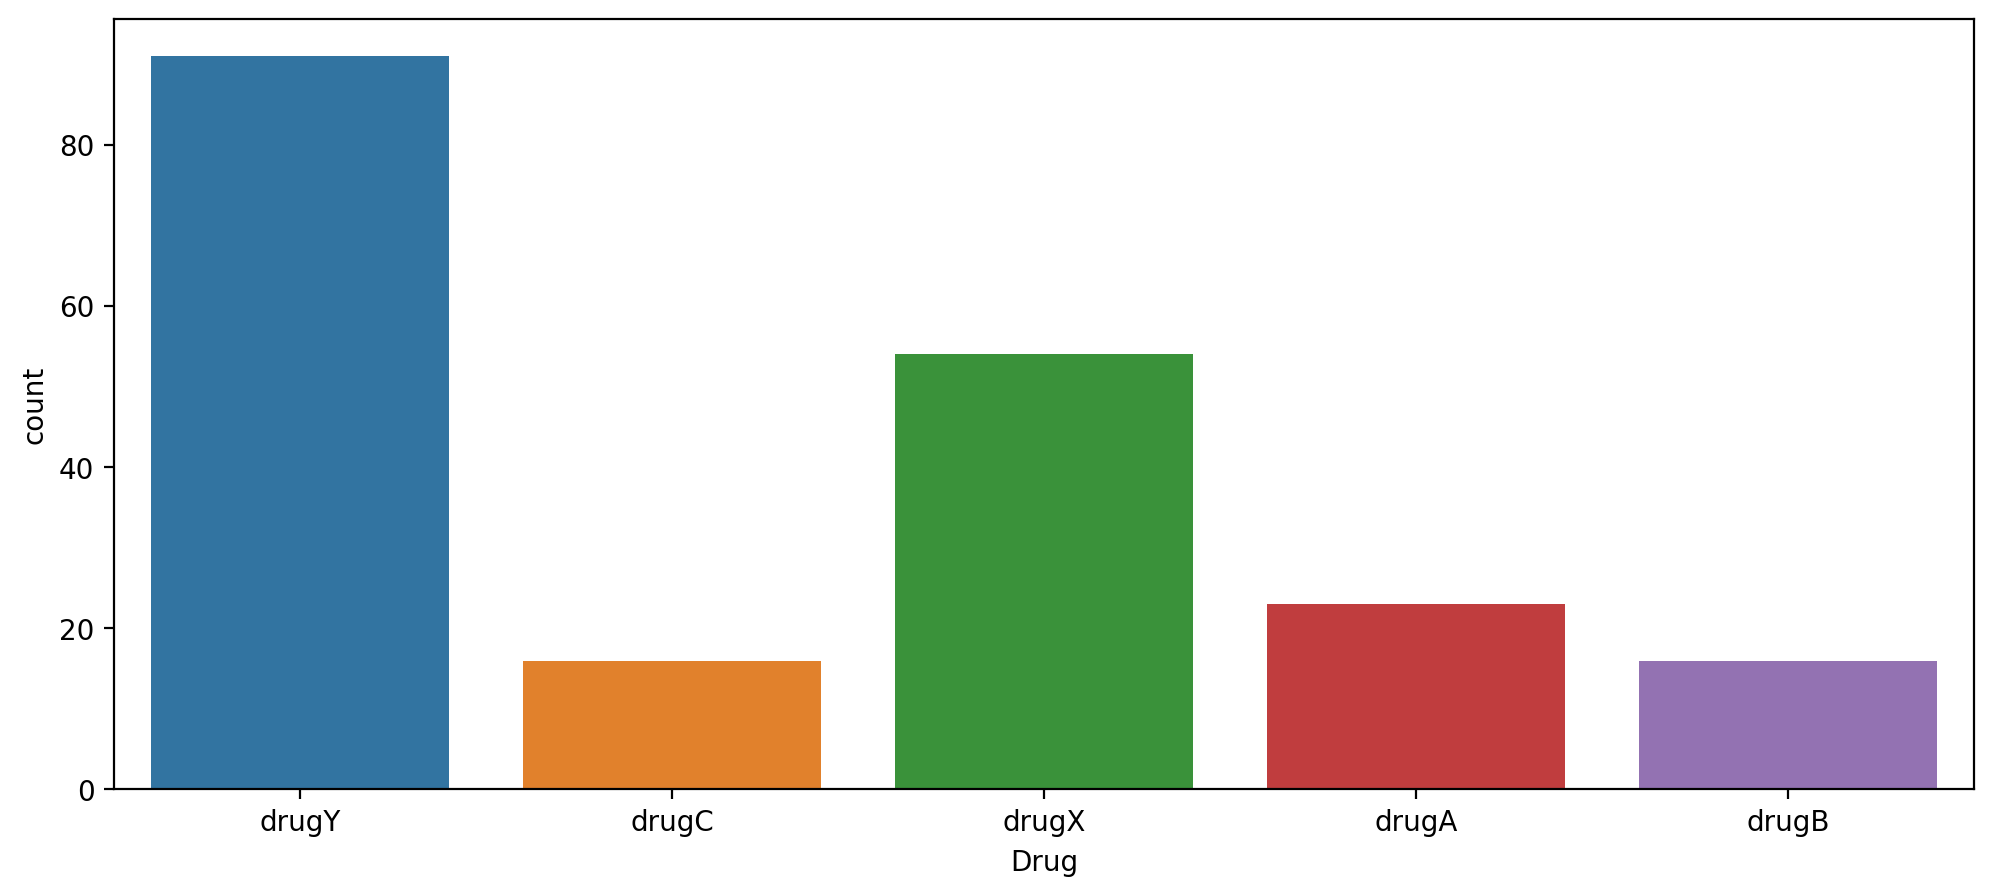

In [9]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Drug',data=drugs)

In [10]:
drugs['Drug'].value_counts().sort_values(ascending=False)

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

# Q. What is the effect of gender on drug prescribed?

<Axes: xlabel='Drug', ylabel='count'>

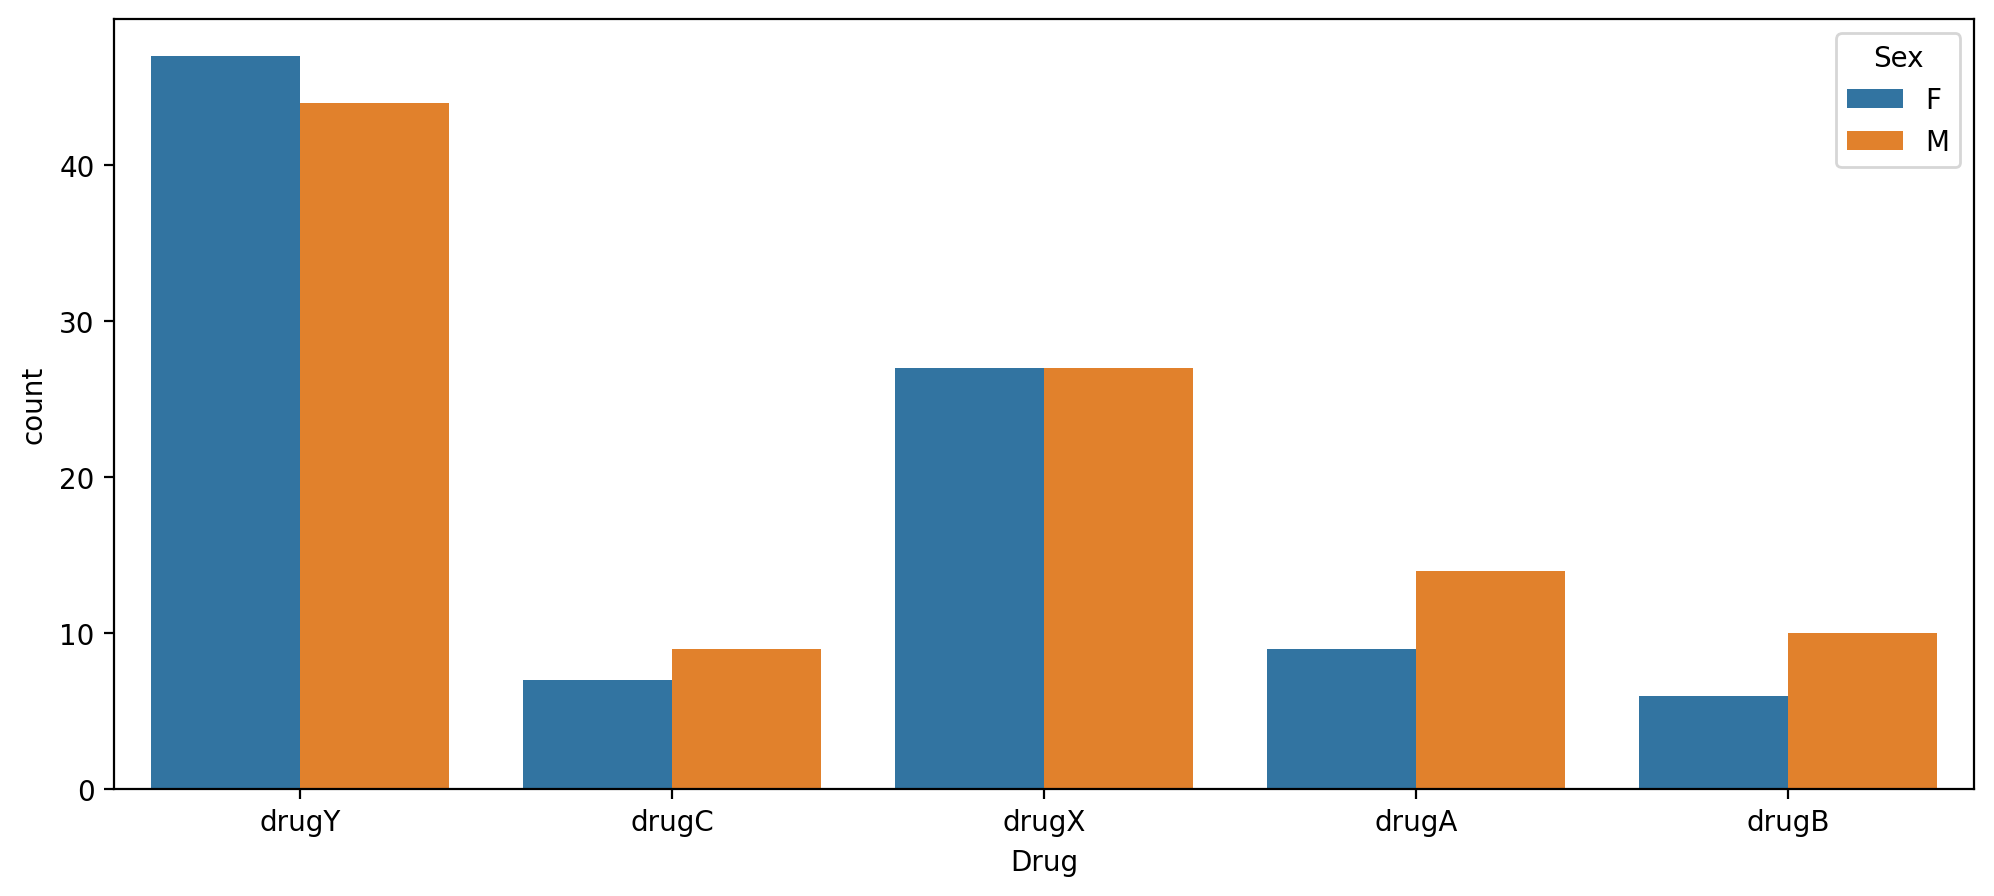

In [11]:
# both are categorical columns only
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Drug',data=drugs,hue='Sex')

### All the drugs are prescribed to both males and females.

# Q. How is BP associated with drug prescribed?

<Axes: xlabel='BP', ylabel='count'>

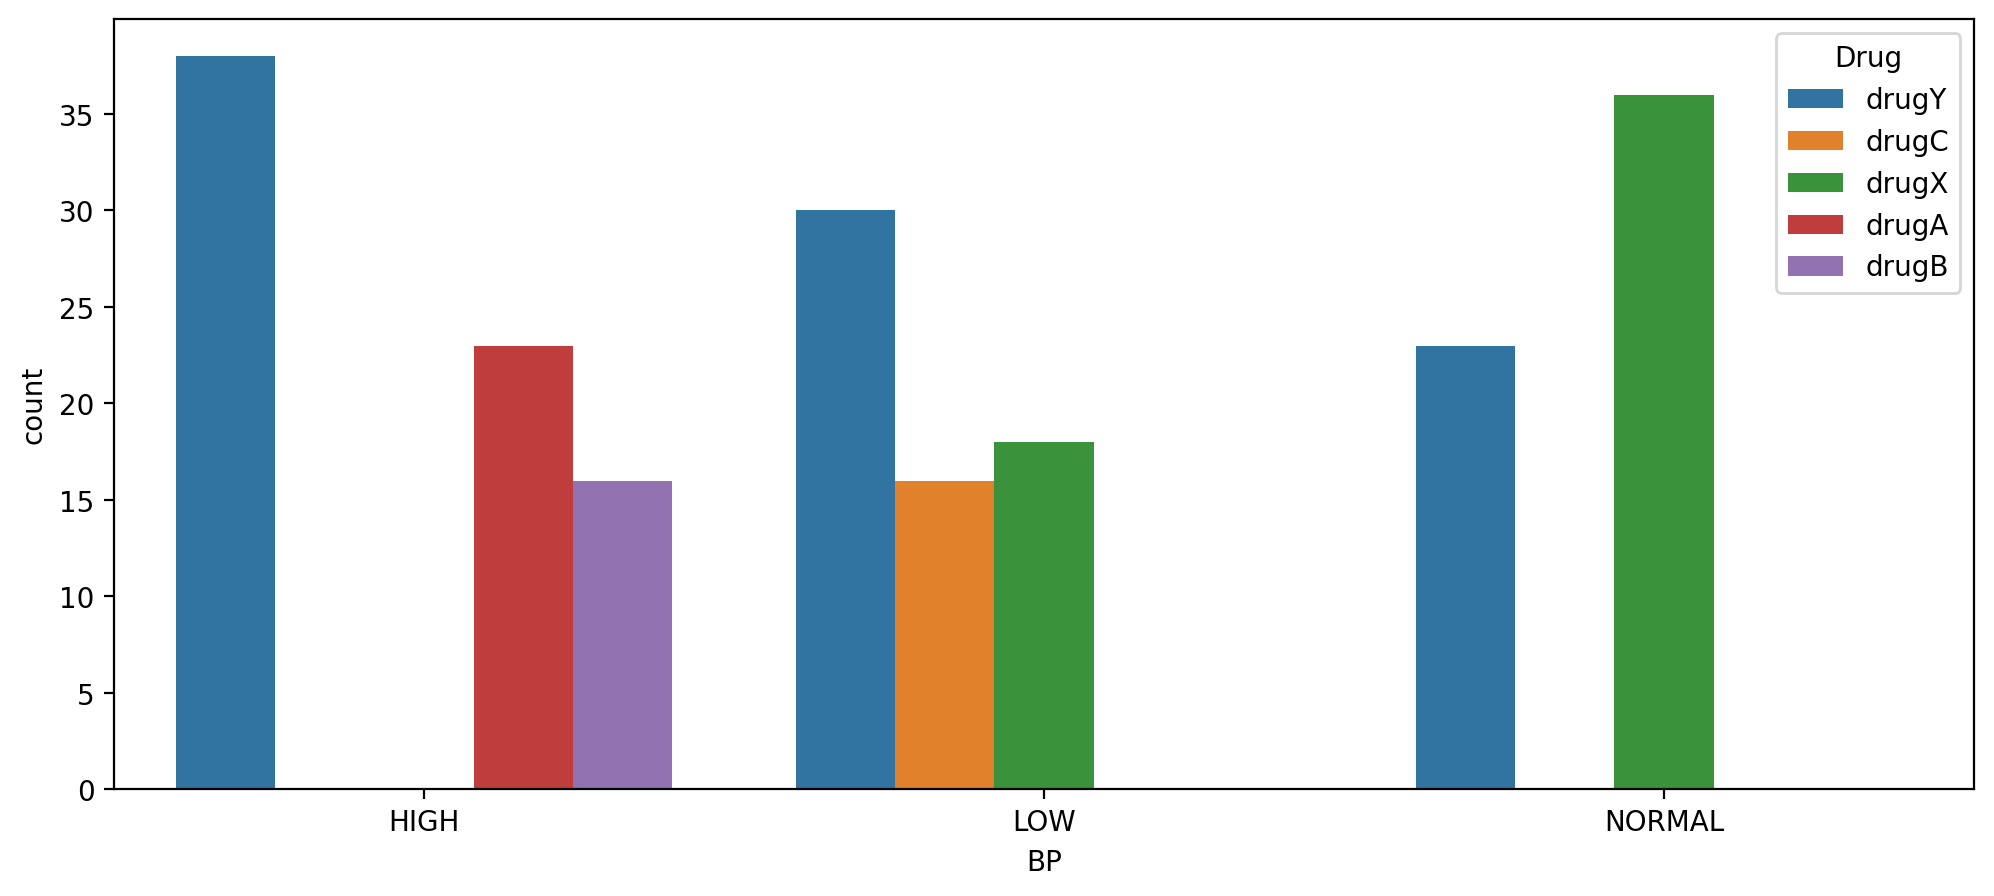

In [12]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data=drugs,x='BP',hue='Drug')

- drug-A & drug-B are specifically meant for treating high BP problems.
- drug-C is meant for only low BP problems.
- drug-X is not recomended to high BP problems.
- drug-Y is nothing to do with treating BP problems.

# Q. How Cholesterol associated with drug prescribed?

<Axes: xlabel='Cholesterol', ylabel='count'>

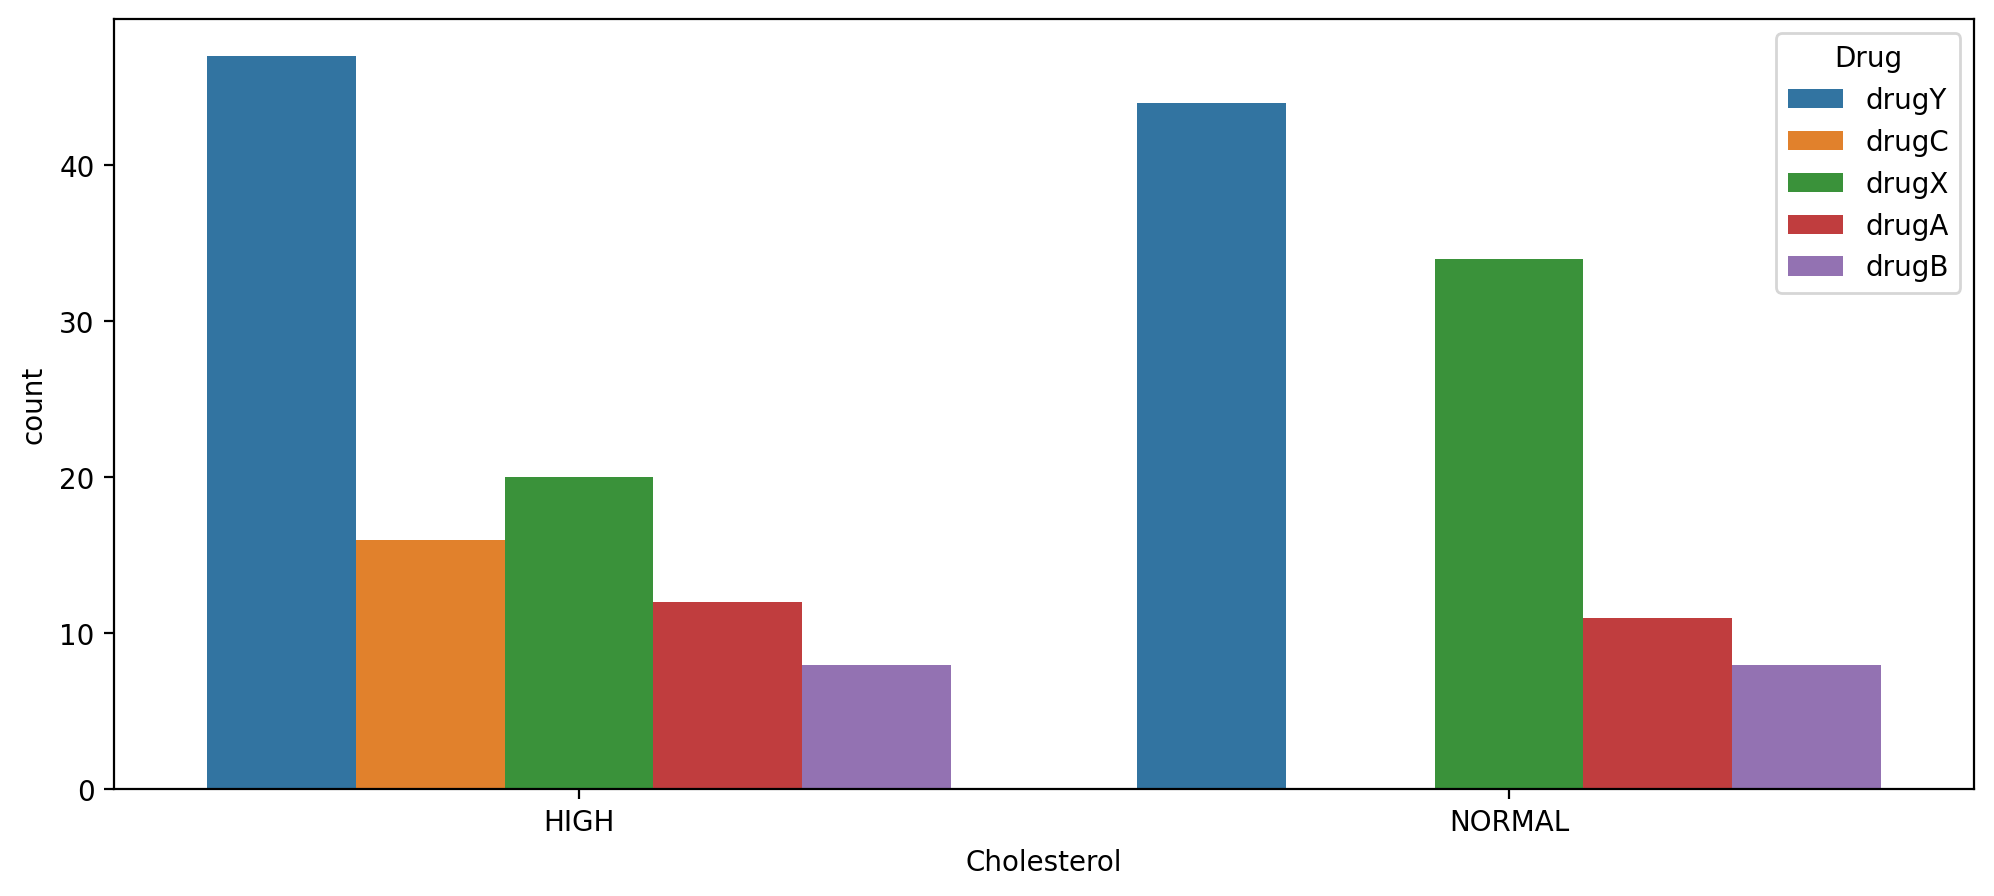

In [13]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data=drugs,x='Cholesterol',hue='Drug')

- drug-C is specifically to treat high Cholesterol.
- drug-Y, drug-X,drug-A , drug-B are not related with Cholesterol treatment.

# Q. How Na_to_K levels are associated with drug prescribed?

<ipython-input-14-13a8d1e30045>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drugs['Na_to_K'],hist=False)


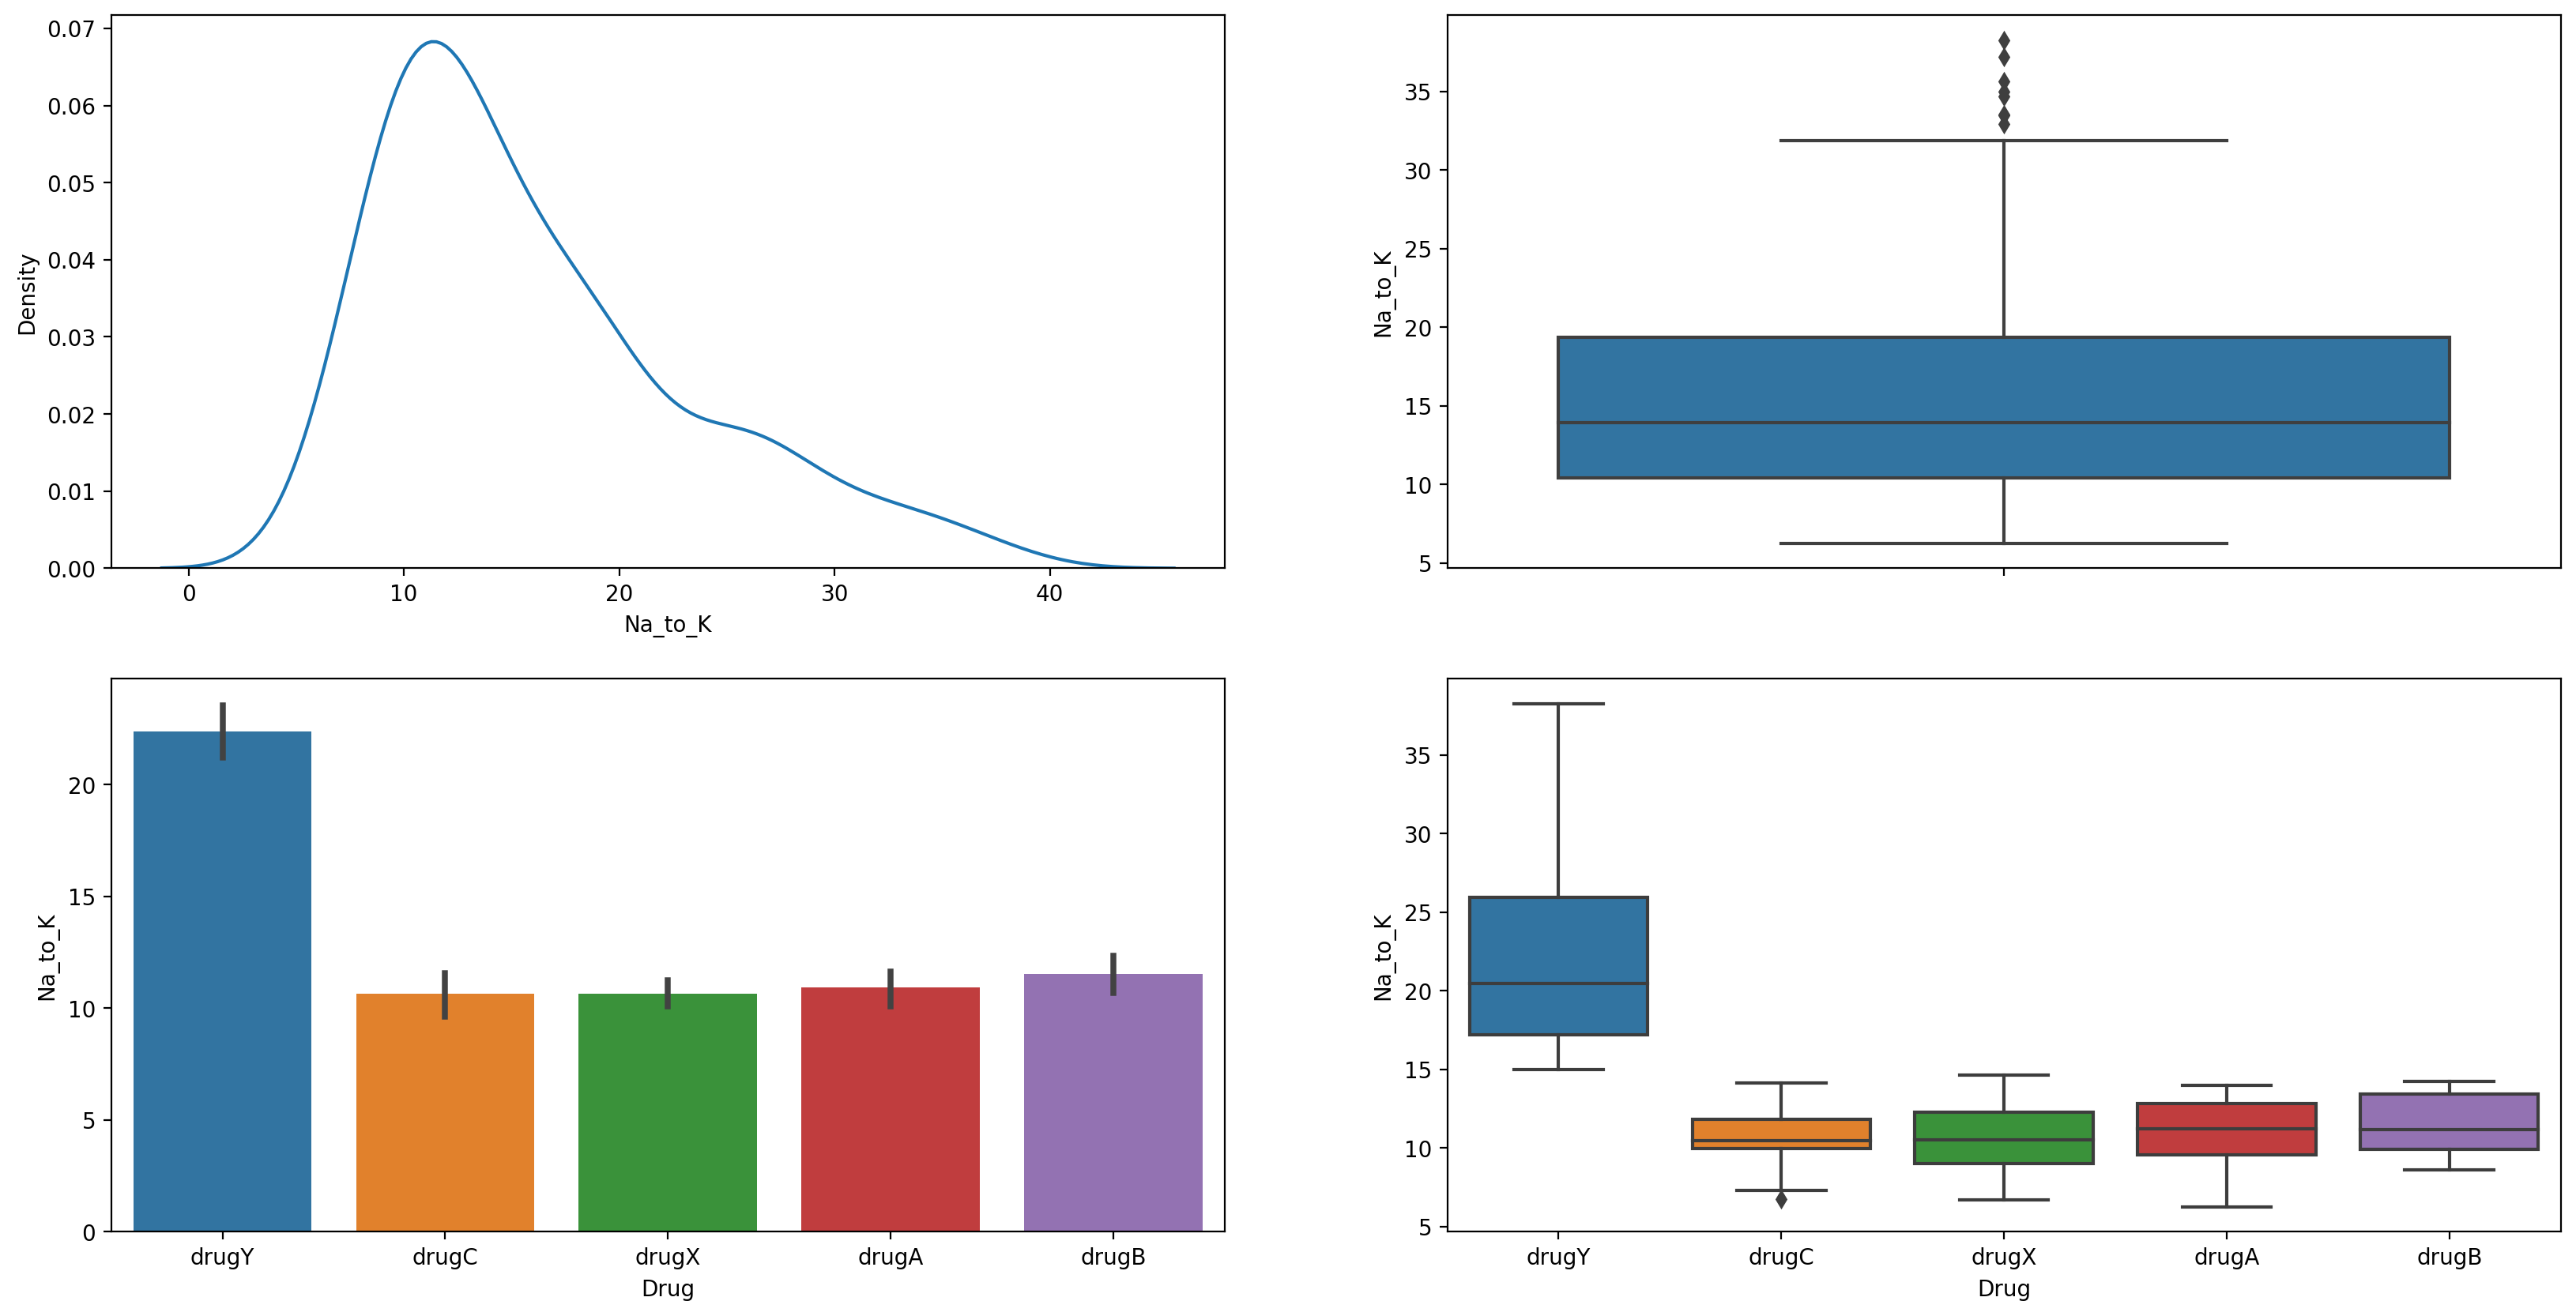

In [14]:
plt.figure(figsize=(20,10),dpi=200)
plt.subplot(2,2,1)
sns.distplot(drugs['Na_to_K'],hist=False)
plt.subplot(2,2,2)
sns.boxplot(y='Na_to_K',data=drugs)
plt.subplot(2,2,3)
sns.barplot(x='Drug',y='Na_to_K',data=drugs)
plt.subplot(2,2,4)
sns.boxplot(x='Drug',y='Na_to_K',data=drugs)
plt.show()

### drug-Y is only prescribed to patients having Na_to_K levels >15.

<ipython-input-15-6d96167433f0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drugs['Age'],hist=False)


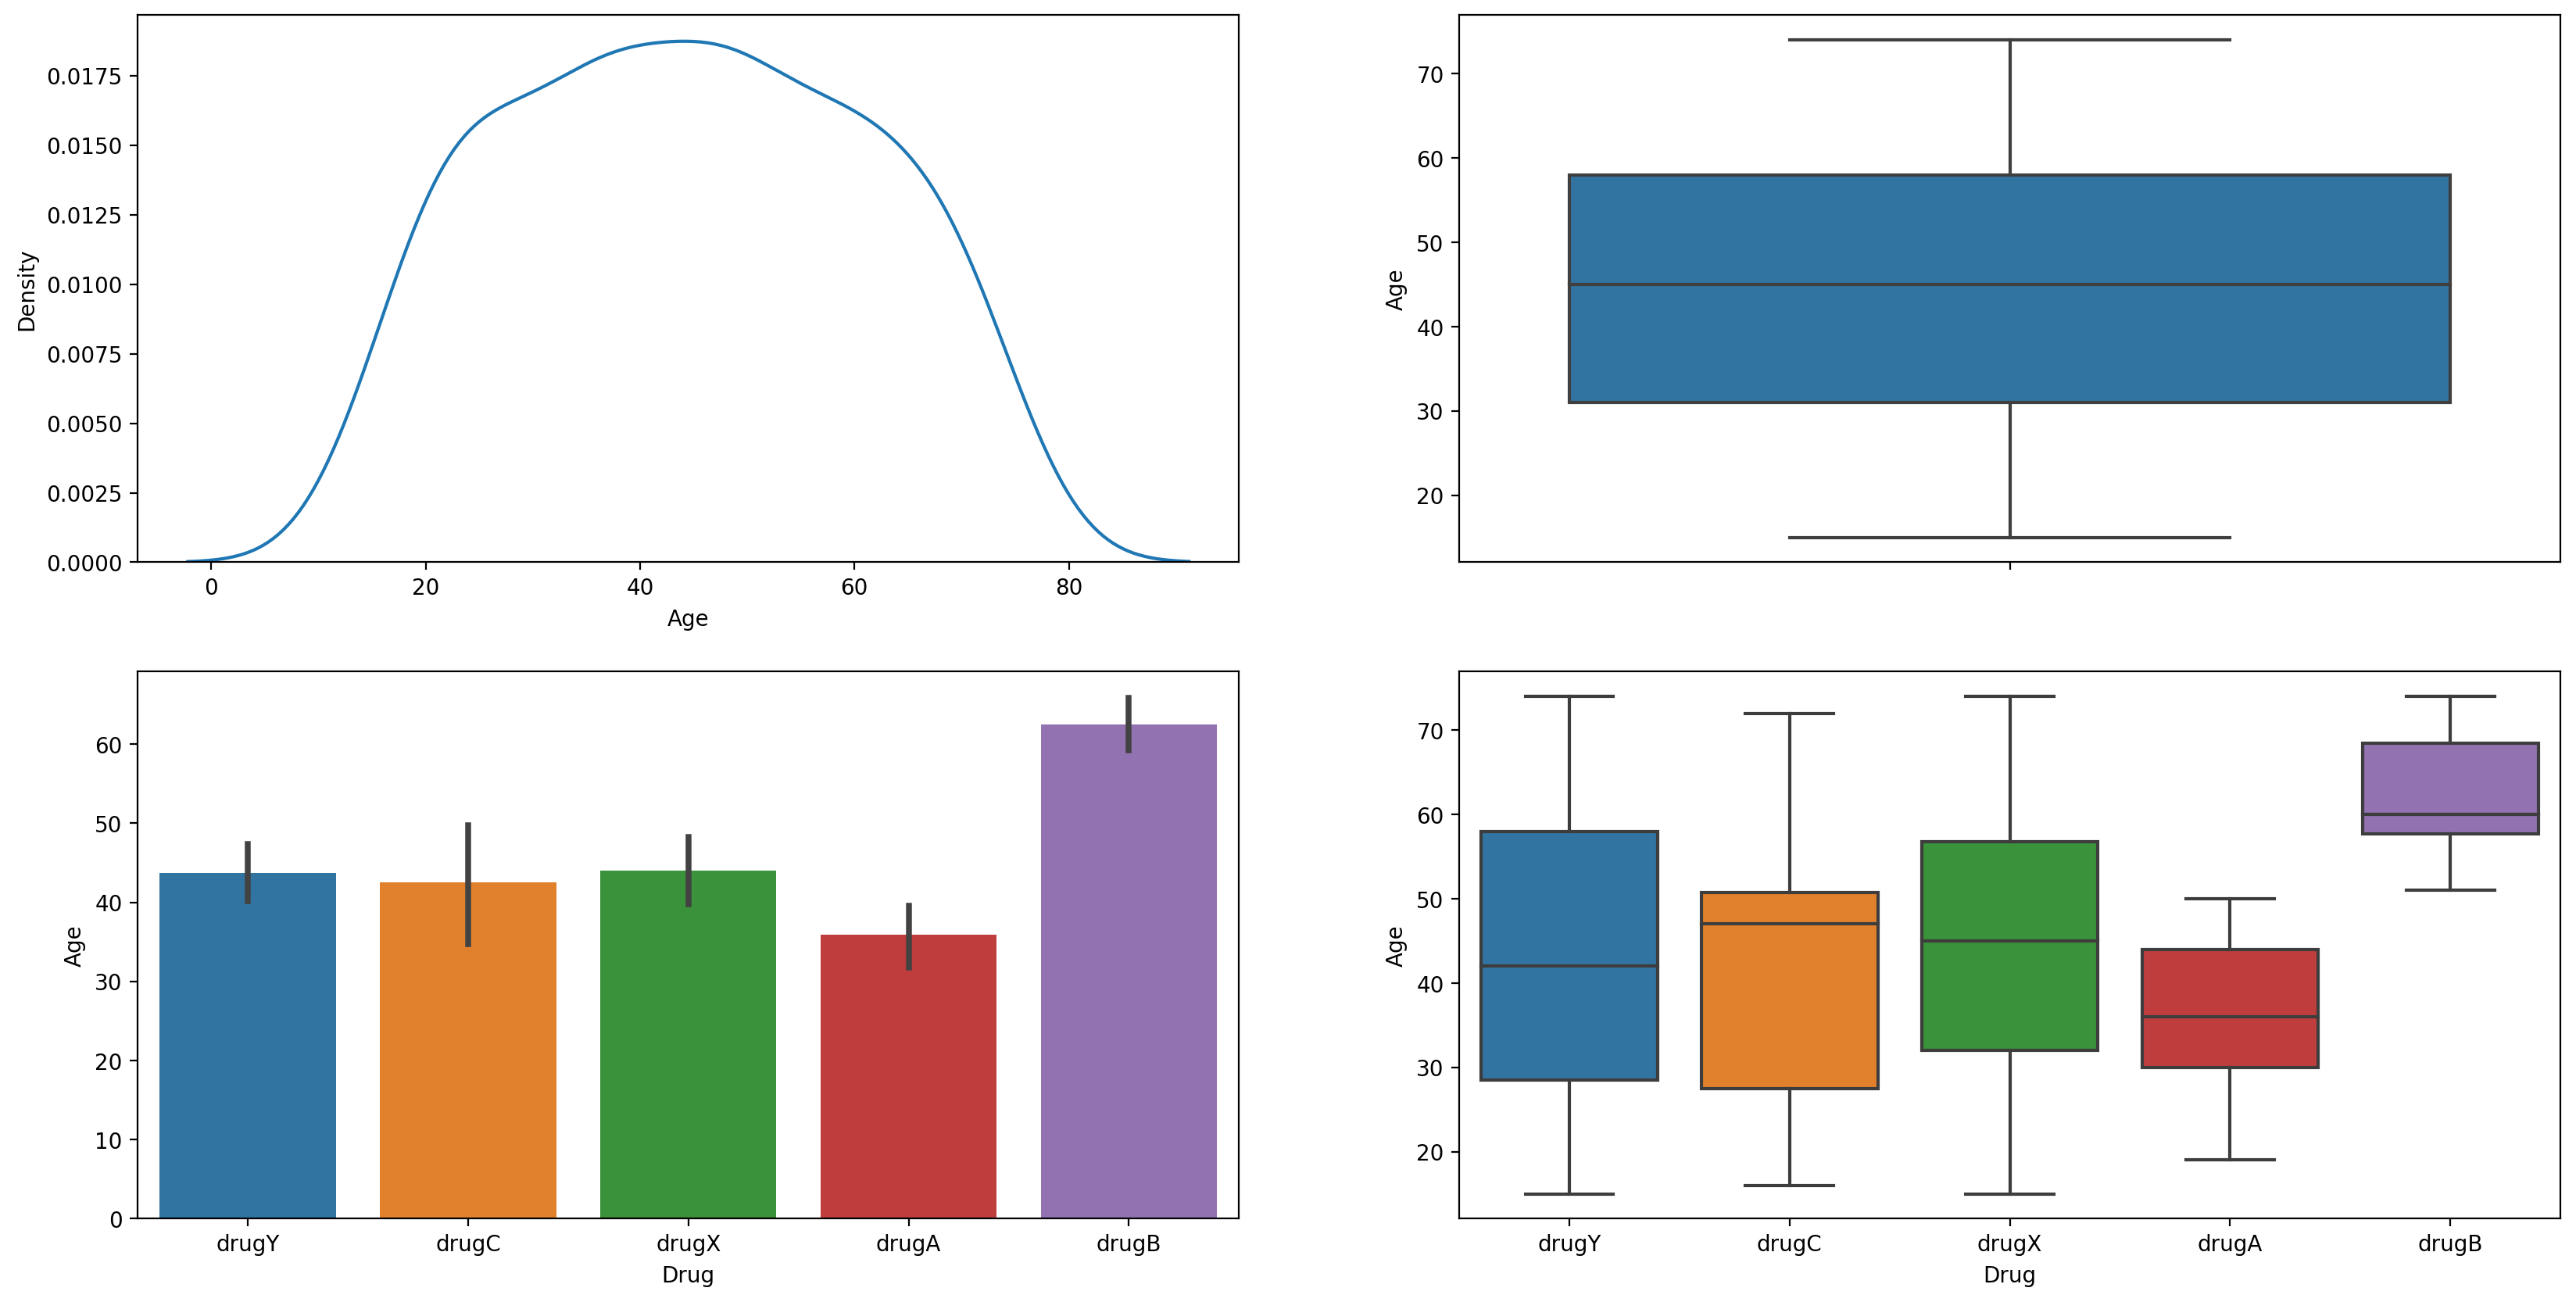

In [15]:
plt.figure(figsize=(20,10),dpi=200)
plt.subplot(2,2,1)
sns.distplot(drugs['Age'],hist=False)
plt.subplot(2,2,2)
sns.boxplot(y='Age',data=drugs)
plt.subplot(2,2,3)
sns.barplot(x='Drug',y='Age',data=drugs)
plt.subplot(2,2,4)
sns.boxplot(x='Drug',y='Age',data=drugs)
plt.show()

### drug-B is meant for people having higher age.

# Fetching Independent and Dependent Features:

In [16]:
X=drugs[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y=drugs[['Drug']]
print("Independent Features set Shape :",X.shape)
print("Dependent Features set Shape   :",Y.shape)

Independent Features set Shape : (200, 5)
Dependent Features set Shape   : (200, 1)


In [17]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [18]:
Y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


# Encoding:

In [19]:
# Using the map function to encode the 'Category' column
X['Sex'] = X['Sex'].map({'M':0,'F':1})
X['BP'] = X['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2})
X['Cholesterol'] = X['Cholesterol'].map({'NORMAL':0,'HIGH':1})
X.head()

<ipython-input-19-88e6f4d88570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M':0,'F':1})
<ipython-input-19-88e6f4d88570>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BP'] = X['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2})
<ipython-input-19-88e6f4d88570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,1,25.355
1,47,0,0,1,13.093
2,47,0,0,1,10.114
3,28,1,1,1,7.798
4,61,1,0,1,18.043


# Splitting data into training and test series:

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (160, 5)
x_test shape: (40, 5)
y_train shape: (160, 1)
y_test shape: (40, 1)


# Train the model:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Creating a k-nearest neighbors classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Training the classifier on the training set
knn_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [22]:
# Making predictions on the traitest set
pred_train = knn_classifier.predict(x_train)
pred_test = knn_classifier.predict(x_test)

# Evaluating the performance of the classifier
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

# Displaying the results
print("Training Set accuracy:", train_accuracy)
print("Testing Set accuracy:", test_accuracy)

Training Set accuracy: 0.825
Testing Set accuracy: 0.75


# Trying a Decision Tree model:

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Creating a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training set
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Making predictions on the training set and test set
pred_train = decision_tree_classifier.predict(x_train)
pred_test = decision_tree_classifier.predict(x_test)

# Evaluating the performance of the classifier
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

# Displaying the results
print("Training Set accuracy:", train_accuracy)
print("Testing Set accuracy:", test_accuracy)

Training Set accuracy: 1.0
Testing Set accuracy: 1.0
